In [312]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import datetime as dt

In [313]:
data=pd.read_csv('/kaggle/input/health-dataset/healthcare_dataset.csv')

In [314]:
data.head(1)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal


In [315]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

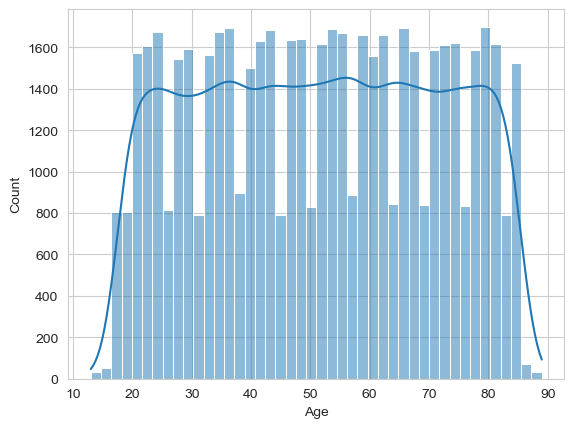

In [316]:
sns.histplot(x='Age',data=data,kde=True)
plt.show()

In [317]:
data['Age'].skew()

-0.005735270674183171

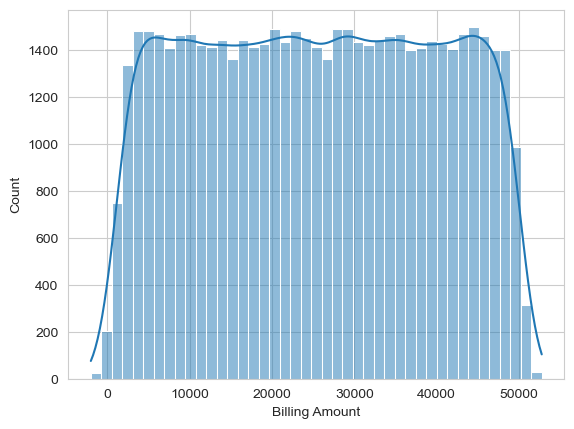

In [318]:
sns.histplot(x='Billing Amount',data=data,kde=True)
plt.show()

In [319]:
cat_cols=data.select_dtypes(include=['object']).columns.tolist()
print(cat_cols)

['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results']


In [320]:
cat_cols.remove('Date of Admission')
cat_cols.remove('Discharge Date')
cat_cols.remove('Name')
cat_cols.remove('Doctor')

print(cat_cols)

['Gender', 'Blood Type', 'Medical Condition', 'Hospital', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']


In [321]:
#Feature Engineering
#Converting date to Day,Month and Year
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'],errors='coerce')
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'],errors='coerce')


In [322]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

In [323]:
data['No of days in Hospital']=data['Discharge Date']-data['Date of Admission']

In [324]:
data.head(1)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,No of days in Hospital
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2 days


In [325]:
data['No of days in Hospital']=data['No of days in Hospital'].astype('str')


In [326]:
data['No of days in Hospital']=data['No of days in Hospital'].apply(lambda x :x.split(' ',)[0])



In [327]:
data.head(1)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,No of days in Hospital
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2


In [328]:
data['No of days in Hospital']=data['No of days in Hospital'].astype(int)

In [329]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Name                    55500 non-null  object        
 1   Age                     55500 non-null  int64         
 2   Gender                  55500 non-null  object        
 3   Blood Type              55500 non-null  object        
 4   Medical Condition       55500 non-null  object        
 5   Date of Admission       55500 non-null  datetime64[ns]
 6   Doctor                  55500 non-null  object        
 7   Hospital                55500 non-null  object        
 8   Insurance Provider      55500 non-null  object        
 9   Billing Amount          55500 non-null  float64       
 10  Room Number             55500 non-null  int64         
 11  Admission Type          55500 non-null  object        
 12  Discharge Date          55500 non-null  dateti

In [330]:
data['Hospital'].value_counts()

Hospital
LLC Smith                      44
Ltd Smith                      39
Johnson PLC                    38
Smith Ltd                      37
Smith PLC                      36
                               ..
and Montoya Flores, Boyer       1
Carter and Dunn King,           1
Hall, Brown Black and           1
Peterson Scott and Thomas,      1
Moreno Murphy, Griffith and     1
Name: count, Length: 39876, dtype: int64

In [331]:
#Trying to experiment with Hospital Names giving Indian Hospital Names instead of synthetic data.It will be fun.
data['Hospital']=data['Hospital'].str.replace('LLC Smith','Moolchand')
data['Hospital']=data['Hospital'].str.replace('Ltd Smith','Apollo')
data['Hospital']=data['Hospital'].str.replace('Johnson PLC','Manipal')
data['Hospital']=data['Hospital'].str.replace('Smith Ltd','AIIMS')
data['Hospital']=data['Hospital'].str.replace('Smith PLC','Medanta')
data['Hospital']=data['Hospital'].str.replace('Smith Group','Safdarjung')
data['Hospital']=data['Hospital'].str.replace('Johnson Inc','Chanan Devi')
data['Hospital']=data['Hospital'].str.replace('Smith Inc','Tata Memorial')
data['Hospital']=data['Hospital'].str.replace('Smith LLC','Artemis')
data['Hospital']=data['Hospital'].str.replace('Group Smith','Wellingdon')


In [333]:
data['Hospital'].value_counts()

Hospital
Moolchand                      44
Apollo                         39
Manipal                        38
AIIMS                          37
Medanta                        36
                               ..
and Montoya Flores, Boyer       1
Carter and Dunn King,           1
Hall, Brown Black and           1
Peterson Scott and Thomas,      1
Moreno Murphy, Griffith and     1
Name: count, Length: 39876, dtype: int64